# Homework 7. K-means and Recommendation system

***Double Click here to edit this cell***

- Name: 이재혁
- Student ID: 201502552 
- Submission date: 2020/06/19

## Problem 1 (10 pts): K-means

- We want to cluster data in sample_data_1.csv
- Estimate the best k for sample_data_1.csv
- You must show the process to find the best k
- use `sklearn.cluster.KMeans`

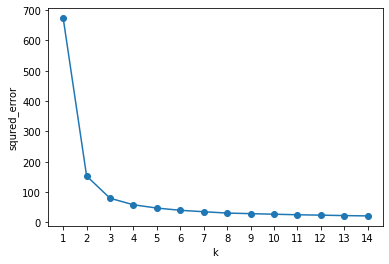

In [316]:
# YOUR CODE HERE. You may use as many code cells as you want.
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

test = pd.read_csv("sample_data_1.csv")
ks=range(1,15)
squared_error = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(test)
    squared_error.append(model.inertia_)
plt.plot(ks,squared_error,'-o')
plt.xlabel('k')
plt.ylabel('squred_error')
plt.xticks(ks)
plt.show()

### Your conclusion:
``` 
k 가 커질수록 목적 함수는 최소화 되지만 cluster끼리의 거리가 커지는 단점이 존재한다. 따라서 error 없는 완벽한 optimalize 한 k 보다는 
rule of thunb(경험법칙)에 의거한 k 즉 k가 3정도가 되었을때 가장 효욜적이라고 생각한다.
즉 가성비라는 것이 존재 한다고 생각하며 1. cluster의 거리 2. k 3. 목적함수 최소화라는 3가지 옵션을 고려했을때 이 문제에서는 k = 3 일때 가장 가성비가 좋다고 생각한다. 

```

## Problem 2 (40 pts): K-means implementation

- Make your own implementaion of K-means algorithm
- If the sum of distances between previous centroids and current centroids is less than or equal to `EPSILON`, K-means stops.
- If K-means algorithm reaches the maximum number of iterations `max_iter`, it stops.
- In `fit` method, you must run k-means in `n_init` times with different centroid seeds. Then choose the best.
- `fit` method computes centroids and labels and stores them in `self.cluster_centers_` and `self.labels_`
- `predict` method returns the centroids closest to each point in `X`
- `score` method returns **the negative of** the sum of sqaured distances between each point in `X` and the centroid closest to the point.

In [317]:
import numpy as np
import math, random
from scipy.spatial import distance_matrix

class MyKMeans:
    """performs k-means clustering using numpy"""

    def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
        self.n_clusters = n_clusters        # number of clusters
        self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
        self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
        self.max_iter = max_iter            # maximum number of iterations
        self.random_state = random_state    # random number seed
        self.cluster_centers_ = None        # means of clusters
        self.labels_ = None                 # X's assignments to clusters
        
        
    def classify(self, input1):
        a = min(range(self.n_clusters),key=lambda i: np.dot(input1-self.cluster_centers_[i],input1-self.cluster_centers_[i]))
        
        return a
       
    
    def fit(self, X):
        X = X.astype(float)
        # FILL OUT
        a = self.n_clusters
        self.cluster_centers_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False), :]
        assignments = None
        max_num = 0
        old_centers = np.zeros(np.shape(self.cluster_centers_))
        tsum = 0
       
        while True:
            if self.max_iter == max_num:
                break
            self.labels_ = list(map(self.classify, X))
                   
            tsum = np.sum(np.sqrt(np.sum((self.cluster_centers_ - old_centers)**2, axis = 1)))
            
            if assignments == self.labels_:
                self.labels_ = np.array(assignments)
                break
            else:
                assignments = self.labels_.copy()
                self.cc = np.array(assignments)
            
            if tsum <= self.EPSILON :
                self.labels_ = np.array(assignments)
                break
            else:
                old_centers = self.cluster_centers_.copy() 
            
            for i in range(self.n_clusters):
                wp = np.argwhere(self.cc == i)
                i_points = X[wp]
              
                if i_points.any():
                    mean = np.mean(i_points, axis =0)
                    self.cluster_centers_[i] = mean[0,:]
                    
            max_num = max_num +1
        return self
        
        
    def predict(self, X):
        X = X.astype(float)
        # FILL OUT
        return self.cluster_centers_
    
    def score(self, X):
        X = X.astype(float)
        tm = 0
        for i in range(self.n_clusters):
            tm = tm + np.sum((X[self.labels_== i]-self.cluster_centers_[i])**2)
            
        return -tm
        # FILL OUT

### Run the following code:

In [318]:
# DO NOT EDIT
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.score(X))

[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0


### Your output must be the following:
```
[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0
```

### Run the following code:

In [319]:
# DO NOT EDIT
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('sample_data_2.csv', 'r') as rf:
    reader = csv.reader(rf)
    X2 = np.array(list(reader))

ks3 = range(1, 21)
%time errors3 = [-MyKMeans(n_clusters=k, n_init=10).fit(X2).score(X2) for k in ks3]

Wall time: 17.2 s


윈도우 시스템 with open('sample_data_2.csv', 'rb') as rf:

### Your code will be graded based on the correctness and the performance
### My implementation result:
```
CPU times: user 4.18 s, sys: 3.92 ms, total: 4.18 s
Wall time: 4.2 s
```

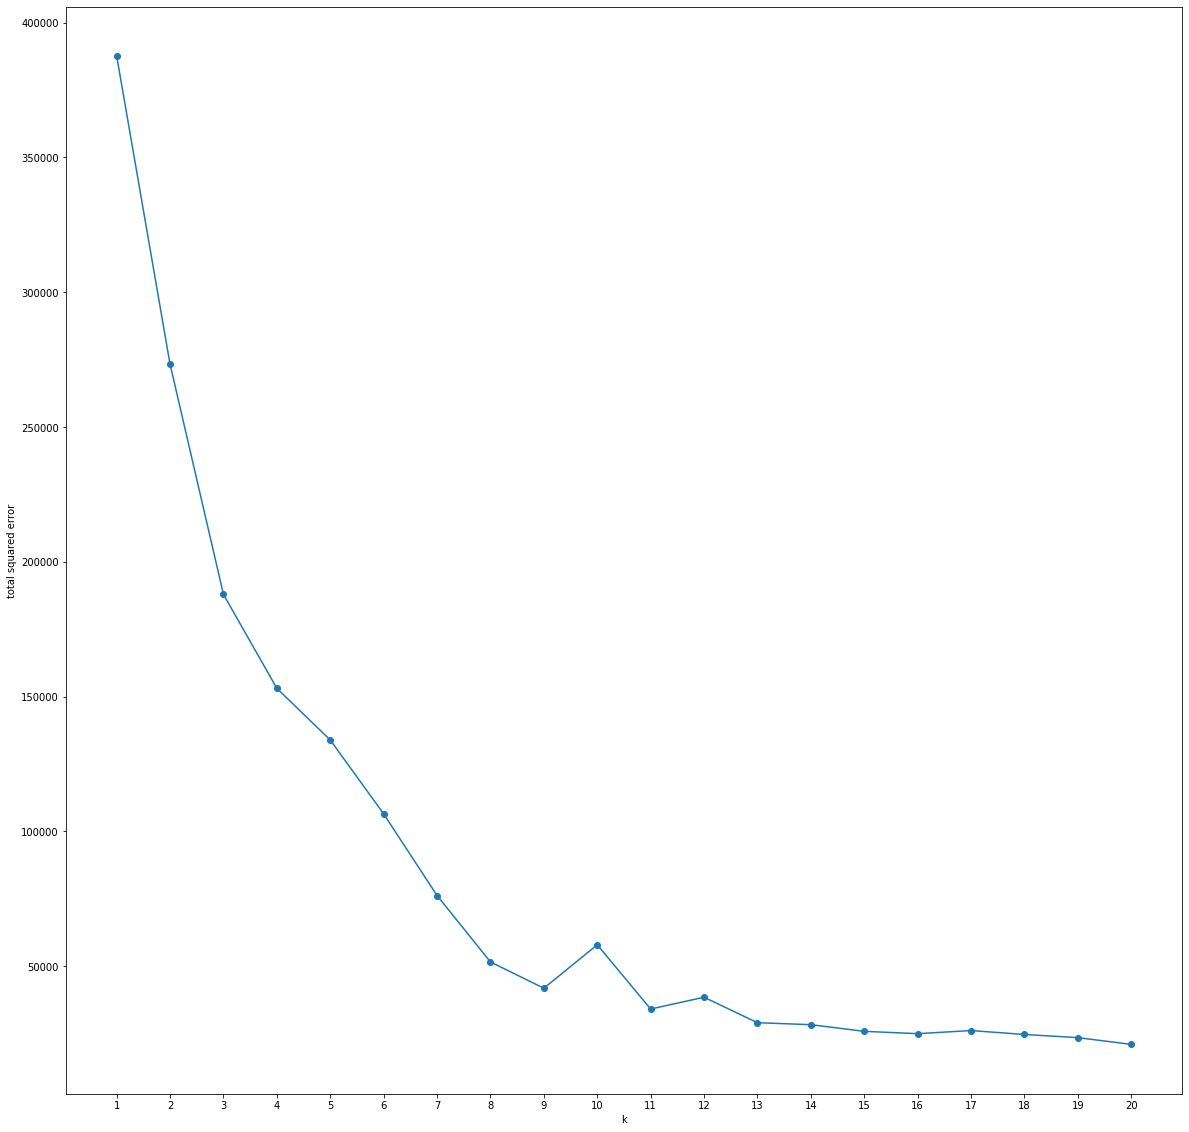

In [320]:
# DO NOT EDIT
plt.figure(figsize=(20,20))
plt.plot(ks3, errors3, '-o')
plt.xticks(ks3)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your output must be similar to the following:
<img src="hw8_1.png">

## Problem 3 (40 pts): Recommender implementation

- Make your own implementaion of item-based recommender system
- You may use the code in textbook, but it may be too slow for large datasets.
- You shouldn't import and use any module implementing recommender system directly
- Use cosine similarity for item similarity (Assume that all null values are zero)

- We will use movie rating dataset

In [321]:
import pandas as pd

movies = pd.read_csv('movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [322]:
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [323]:
ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

## The following is top 10 recommendations of movie titles and their genres  from top 1 to top 10 for user 1
```
Ferris Bueller's Day Off (1986)                   Comedy              
Die Hard (1988)                                   Action|Crime|Thriller
Breakfast Club, The (1985)                        Comedy|Drama        
Fifth Element, The (1997)                         Action|Adventure|Comedy|Sci-Fi
Aliens (1986)                                     Action|Adventure|Horror|Sci-Fi
Mars Attacks! (1996)                              Action|Comedy|Sci-Fi
Sixth Sense, The (1999)                           Drama|Horror|Mystery
Austin Powers: The Spy Who Shagged Me (1999)      Action|Adventure|Comedy
2001: A Space Odyssey (1968)                      Adventure|Drama|Sci-Fi
Terminator 2: Judgment Day (1991)                 Action|Sci-Fi       
```    

## Find top 10 recommendations of movie titles and their genres from top 1 to top 10 for user 2

In [324]:
from pandas import DataFrame

In [325]:
import numpy as np 
import pandas as pd
import json


movies.movieId = pd.to_numeric(movies.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')
data = pd.merge(ratings, movies, on='movieId', how='inner')
matrix = data.pivot_table(index='userId', columns='movieId',values='rating')
matrix.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,3.0,5.0,4.0,4.0,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [326]:
t = np.array(matrix[1:2])

In [327]:
def cosine_similarity(v, w):
    return np.dot(v, w) / math.sqrt(np.dot(v, v) * np.dot(w, w))

In [328]:
h = matrix.T
s = h.fillna(0)
movie_matrix = np.array(s)

In [329]:
def user_recomend(num):
    user = np.array(matrix.fillna(0))
    userx = user[num]
    users = np.argwhere(userx!=0)
    item_item_s = []
    items = []
    for i in range(len(user1)):
        for j in range(len(movie_matrix)):
            if i == j: continue
            else:
                z = cosine_similarity(movie_matrix[i],movie_matrix[j])
                items.append(z)
        cor = sum(items)
        movie_id = i
        item_item_s.append((cor,i))
        del items[:]
    item_item_s.sort()
    item_item_s.reverse()
    recommed_movie_id = []
    for i in range(10):
        recommed_movie_id.append(item_item_s[i][1])
    return recommed_movie_id
    

In [ ]:
user_recomend(1)

In [ ]:

for i in recommed_movie_id:
    print(movies.iloc[i:i+1,1:3])


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview" (If that doesn't work, you may print ipynb file in Google Chrome print menu)
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted